### MNIST datasetet analyseras med Naive (shallow neural network) och Deep Neural Network:
- Naive metod har 784 inputs och 10 outputs, inga hidden layers (avg. accuracu cirka 0.9).
- Deep Neural metoden har 2 hidden layers (avg. accuracy cirka 0.98).

In [27]:
import keras
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

sns.set_style('white')

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Normaliserar datan:

In [2]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Plottar lite siffror:

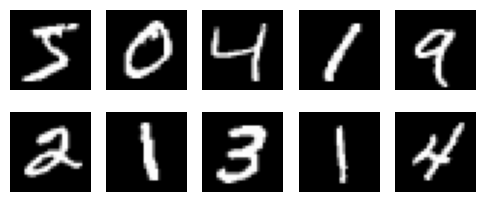

In [4]:
import matplotlib.pyplot as plt

def plot_images(images, nrows=2, ncols=5, figsize=(15, 6)):
    fig, axes = plt.subplots(nrows, ncols, figsize=(1.2*ncols, 1.2*nrows))
    for i, ax in enumerate(axes.flatten()):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
    fig.subplots_adjust(wspace=0.2, hspace=0.2, bottom=0.1)
    
plot_images(X_train)

### MNIST analys med "Naive" Modell:
- Modellen har endast 784 inputs och 10 outputs.

In [5]:
from keras import layers
from keras import models

def make_model(nodes = None, names = None, activations = [], optimizer=None):
    model = keras.Sequential(name="MLP")
    model.add(layers.Flatten(input_shape=(28, 28), name="Input"))
    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, activation=activation, name=name))
        
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
optimizer = keras.optimizers.Adam()
model_naive = make_model(nodes=[10], activations=['softmax'], names=['Output'], optimizer=optimizer)
model_naive.summary()

c:\Users\danie\Documents\GitHUb\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Gör en fit på träningsdatasetet, inklusive validation:

In [25]:
model_naive.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=1/6, verbose=0)

In [18]:
def plot_metrics(df_history, style="-o", title=""):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                ylabel=metric[0], title=title + " " + metric[0],
                ax=ax, style=style)

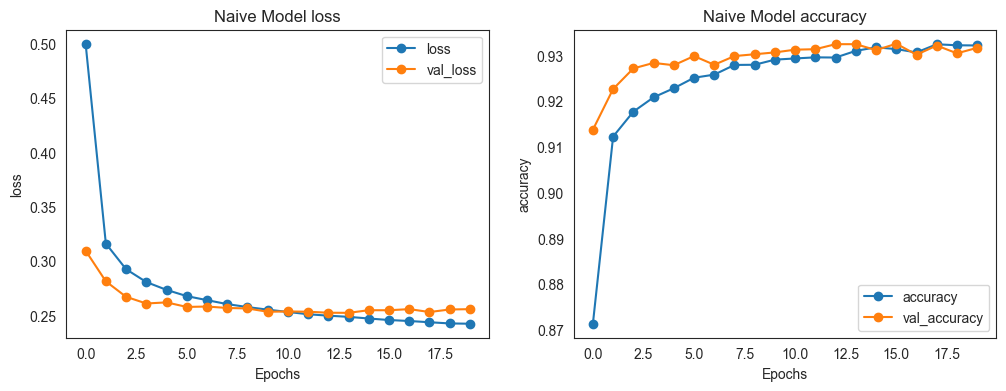

In [19]:
plot_metrics(naive_history, title="Naive Model")

Gör en fit på hela träningsdatasetet:

In [26]:
model_naive.fit(X_train, y_train, epochs=10, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98      0.91      0.94      1135
           2       0.96      0.85      0.90      1032
           3       0.84      0.92      0.88      1010
           4       0.96      0.86      0.91       982
           5       0.99      0.48      0.65       892
           6       0.94      0.96      0.95       958
           7       0.97      0.79      0.87      1028
           8       0.58      0.96      0.72       974
           9       0.80      0.94      0.86      1009

    accuracy                           0.87     10000
   macro avg       0.90      0.86      0.87     10000
weighted avg       0.90      0.87      0.87     10000



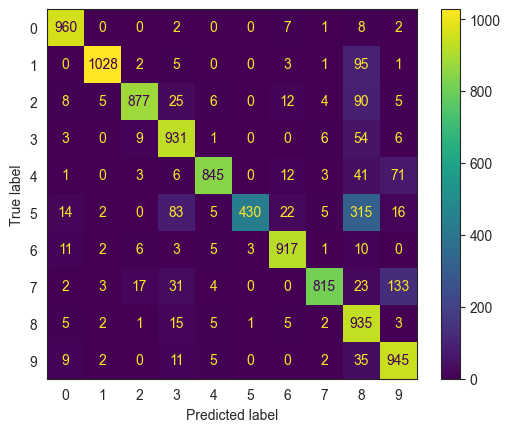

In [ ]:
y_pred = model_naive.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### MNIST med Deep Learning modell:

In [11]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_deep = make_model([128,128,10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden_2", "Output"], optimizer=optimizer)

model_deep.summary()

c:\Users\danie\Documents\GitHUb\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_deep.fit(X_train, y_train, validation_split=1/6, verbose=0, epochs=20)

deep_history = pd.DataFrame(model_deep.history.history)
deep_history.index = range(len(deep_history))

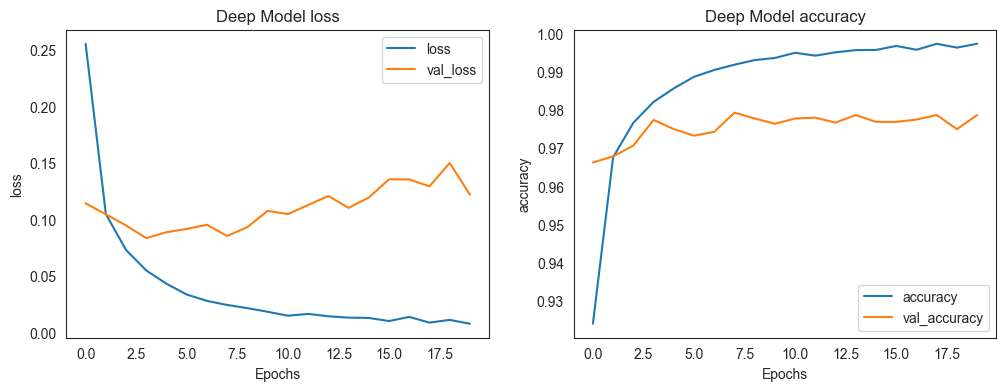

In [20]:
plot_metrics(deep_history, style="-", title="Deep Model")

Kör en fit på hela träningssetet:

In [21]:
model_deep.fit(X_train, y_train, epochs=3, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



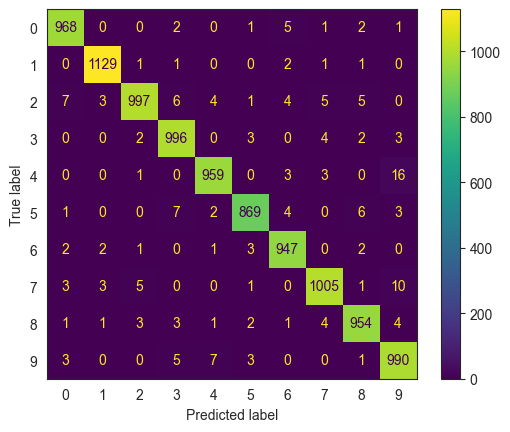

In [ ]:
y_pred = model_deep.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

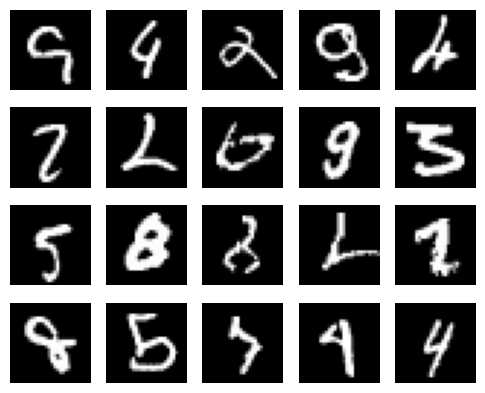

In [24]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]

plot_images(misclassified_samples, 4, 5, (12,8))